In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.rcParams['figure.figsize'] = (30, 20)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv'
shopping = pd.read_csv(url)
shopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
shopping_2d = shopping[['Annual Income (k$)', 'Spending Score (1-100)']]
shopping_2d.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


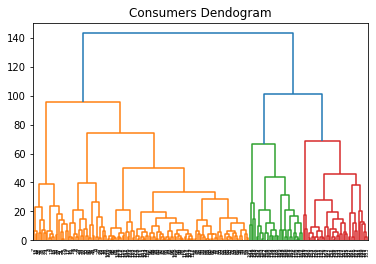

In [4]:
plt.title('Consumers Dendogram')
dendogram = shc.dendrogram(shc.linkage(shopping_2d, method='complete'))

In [5]:
groups_qty = 5
groups = AgglomerativeClustering(n_clusters=groups_qty, affinity='euclidean', linkage='complete')
groups.fit_predict(shopping_2d)

/home/eliabe/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

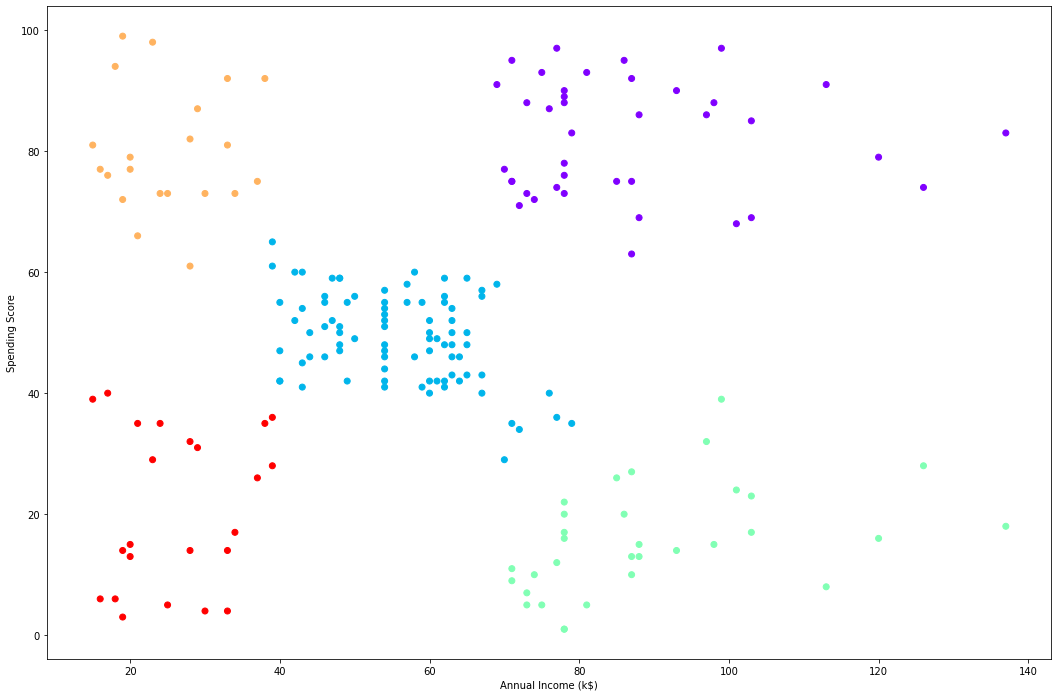

In [7]:
plt.scatter(shopping_2d['Annual Income (k$)'], shopping_2d['Spending Score (1-100)'], c=groups.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.rcParams['figure.figsize'] = (30, 20)
plt.show()

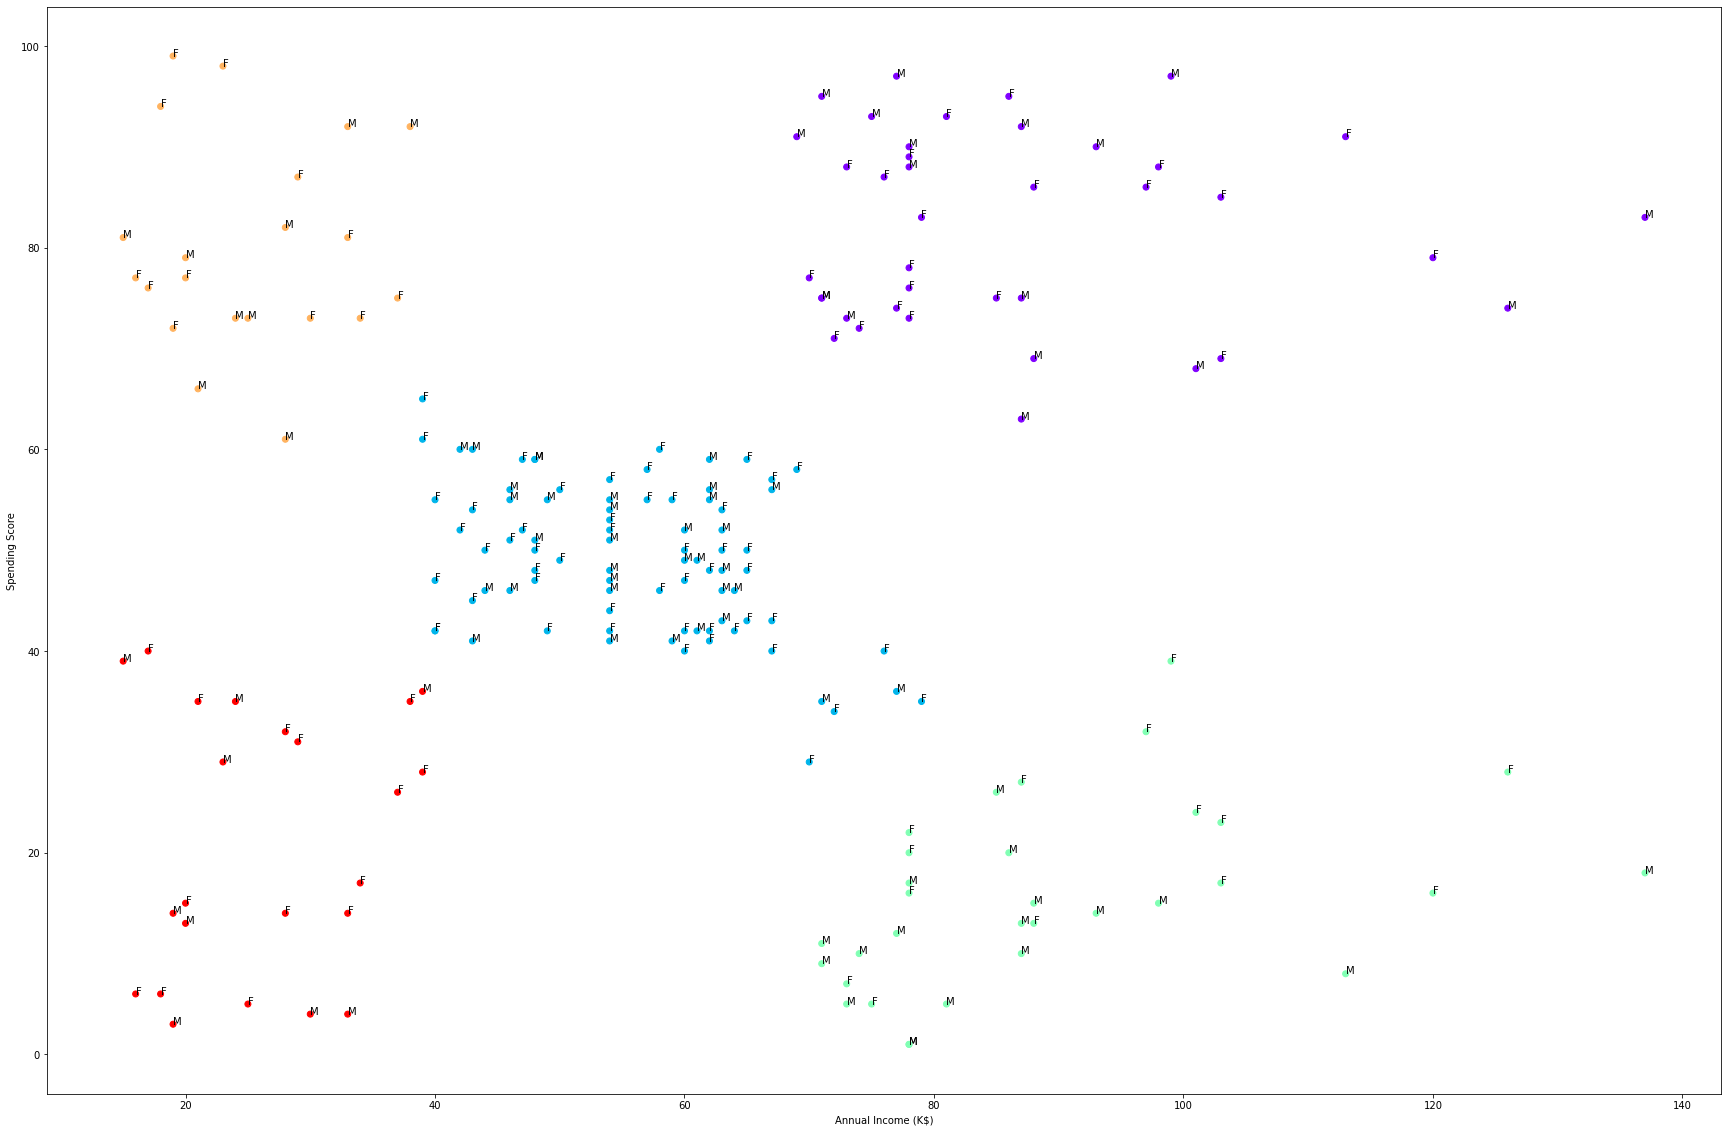

In [9]:
figure, axis = plt.subplots()

plt.scatter(shopping_2d['Annual Income (k$)'], shopping_2d['Spending Score (1-100)'], c=groups.labels_, cmap='rainbow')
axis.set_xlabel('Annual Income (K$)')
axis.set_ylabel('Spending Score')

for i, text in enumerate(shopping['Genre']):
    axis.annotate(text[0], (shopping.iloc[i]['Annual Income (k$)'], shopping.iloc[i]['Spending Score (1-100)']))

plt.show()